<a href="https://colab.research.google.com/github/shuntarotobari/qmacro2nd/blob/main/task3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

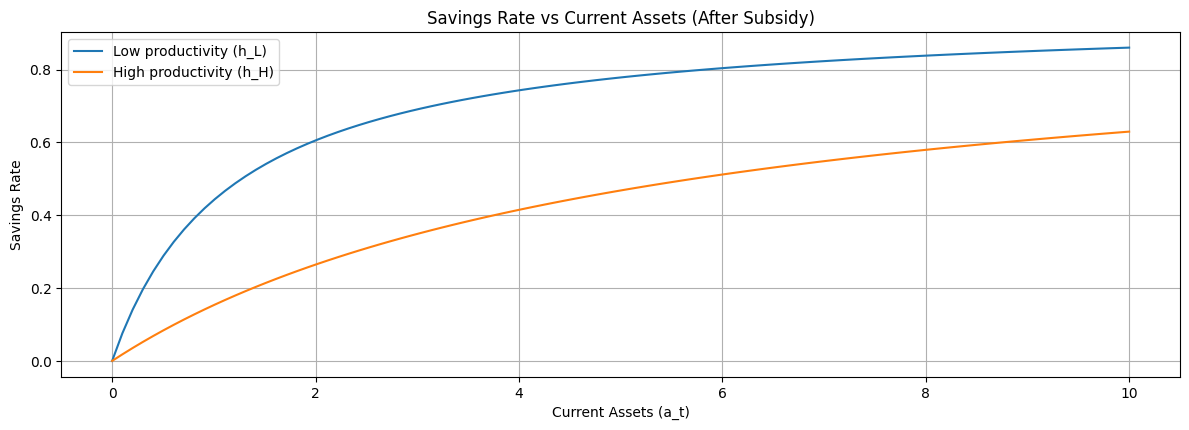

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# パラメータの設定
sigma = 1.5
beta = 0.98
rho = 0.6
sigma_e = 0.6
r = 0.04
w = 1
T = 1

# 生産性の状態
h_L = np.exp(-sigma_e / (1 - rho))
h_H = np.exp(sigma_e / (1 - rho))

# 資産の範囲
a_t = np.linspace(0, 10, 100)


# 貯蓄率の計算（補助金導入後）
def savings_rate_with_subsidy(a_t, h, r, w, T, beta, sigma):
    c_t = (w * h + (1 + r) * a_t + T - a_t)   # 簡略化した消費関数
    a_t1 = w * h + (1 + r) * a_t + T - c_t  # 次期の資産
    return a_t1 / (c_t + a_t1)

savings_rate_L_after = savings_rate_with_subsidy(a_t, h_L, r, w, T, beta, sigma)
savings_rate_H_after = savings_rate_with_subsidy(a_t, h_H, r, w, T, beta, sigma)

# グラフの描画
plt.figure(figsize=(12, 8))

# 補助金導入後
plt.subplot(2, 1, 2)
plt.plot(a_t, savings_rate_L_after, label='Low productivity (h_L)')
plt.plot(a_t, savings_rate_H_after, label='High productivity (h_H)')
plt.xlabel('Current Assets (a_t)')
plt.ylabel('Savings Rate')
plt.title('Savings Rate vs Current Assets (After Subsidy)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
